### Im welchen Genre treten die meisten Collaborationen auf? 

In [1]:
import pandas as pd
import spacy
import spacy.cli
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
from language_tool_python import LanguageTool

c:\Users\lotus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# !pip install language_tool_python

In [2]:
df = pd.read_csv('../data/songs_complete_final.csv')

In [3]:
df.value_counts('genre')

genre
deutschrap      4033
pop             2560
rap             2395
schlager        1343
hip-hop         1271
hip hop         1256
rock             663
indie            632
deutschrock      416
punk rock        390
reggae           264
ambient          222
[]               214
karneval         201
electro          162
deutsch rap      130
instrumental     119
gothic           117
emo              109
cloud rap         69
swing             66
new wave          64
ndw               53
pop rock          53
post-rock         49
party             41
pornorap          27
dubstep           12
metal              5
Name: count, dtype: int64

In [4]:
df

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,"Powpow Dicka, das kein Rap mehr, das ist Kind...",2021,Friday,post-rock,Rock,60
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,"Gefährliche, gefährliche KiKiKiKi Gefährliche ...",2021,Friday,post-rock,Rock,92
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,. Liquid Swords GZA Actual . souljaboytellem...,2020,Friday,post-rock,Rock,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80
17750,t-low,9229,Tyskie (EP),553779,2019-08-02,Fast,Fast by ​​t-low,4782369,"Kozee, cooke die Sauce Ich bin fast fully tat...",2019,Friday,hip-hop,Rap,98
17751,t-low,9229,Tyskie (EP),553779,2019-08-02,Fliegt,Fliegt by ​​t-low (Ft. Murcy),4784534,"Rope God, youre so anorexic Und sie fliegt ja...",2019,Friday,hip-hop,Rap,90
17752,t-low,9229,Tyskie (EP),553779,2019-08-02,Lonely,Lonely by ​​t-low,4784567,"Sie ist lonely, Ja Sie will nur zu ihrem Homi...",2019,Friday,hip-hop,Rap,60


In [5]:
df['full_title'].fillna('', inplace=True)

colabs = df[df["full_title"].str.contains("Ft")]

In [6]:
colabs

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80
5,1099,209826,KING KONG,546439,2020-01-31,KILLA,KILLA by King Khalil (Ft. 2Ton),5189159,"Yo, its that boy Denzel Curry Im finna do this...",2020,Friday,post-rock,Rock,57
7,1099,209826,KING KONG,546439,2020-01-31,ALL BLACK,ALL BLACK by King Khalil (Ft. PA Sports),5189160,Yo pls dont call me Im busy at the moment U ma...,2020,Friday,post-rock,Rock,156
9,1099,209826,KING KONG,546439,2020-01-31,BABYLON,BABYLON by King Khalil (Ft. Azad),5189162,"Studio AlbumsThe Rolling Stones , UK Englands...",2020,Friday,post-rock,Rock,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,t-low,9229,Litty Way,618085,2020-03-20,Schuhe Kaputt,Schuhe Kaputt by ​​t-low (Ft. NOK1D),5402535,"Time on the beat SchuSchu Schuhe sind kaputt,...",2020,Friday,hip-hop,Rap,58
17742,t-low,9229,Litty Way,618085,2020-03-20,Besser,Besser by ​​t-low (Ft. BiggO),5402536,"Baller die Scheine in Automaten Ey, meine Kund...",2020,Friday,hip-hop,Rap,80
17744,t-low,9229,Litty Way,618085,2020-03-20,Light It Up,Light It Up by ​​t-low (Ft. NOK1D & Rei Saike),5402538,"Kozee, cooke die Sauce FüFüFünfer für ne Xan,...",2020,Friday,hip-hop,Rap,102
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80


In [7]:
import re
regex = r"\(Ft\. ([^)]+)\)"

def extract_collaborators(title):
    start_index = title.find("(Ft.")
    end_index = title.find(")", start_index)
    if start_index != -1 and end_index != -1:
        collaborators = title[start_index+4:end_index].strip()
        return collaborators
    else:
        return ""

# Anwendung der Funktion auf die full_title-Spalte
colabs['collaboration'] = colabs['full_title'].apply(extract_collaborators)


<ipython-input-7-356d67205115>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colabs['collaboration'] = colabs['full_title'].apply(extract_collaborators)


In [8]:
colabs

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count,collaboration
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113,Fler
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80,Mert
5,1099,209826,KING KONG,546439,2020-01-31,KILLA,KILLA by King Khalil (Ft. 2Ton),5189159,"Yo, its that boy Denzel Curry Im finna do this...",2020,Friday,post-rock,Rock,57,2Ton
7,1099,209826,KING KONG,546439,2020-01-31,ALL BLACK,ALL BLACK by King Khalil (Ft. PA Sports),5189160,Yo pls dont call me Im busy at the moment U ma...,2020,Friday,post-rock,Rock,156,PA Sports
9,1099,209826,KING KONG,546439,2020-01-31,BABYLON,BABYLON by King Khalil (Ft. Azad),5189162,"Studio AlbumsThe Rolling Stones , UK Englands...",2020,Friday,post-rock,Rock,279,Azad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,t-low,9229,Litty Way,618085,2020-03-20,Schuhe Kaputt,Schuhe Kaputt by ​​t-low (Ft. NOK1D),5402535,"Time on the beat SchuSchu Schuhe sind kaputt,...",2020,Friday,hip-hop,Rap,58,NOK1D
17742,t-low,9229,Litty Way,618085,2020-03-20,Besser,Besser by ​​t-low (Ft. BiggO),5402536,"Baller die Scheine in Automaten Ey, meine Kund...",2020,Friday,hip-hop,Rap,80,BiggO
17744,t-low,9229,Litty Way,618085,2020-03-20,Light It Up,Light It Up by ​​t-low (Ft. NOK1D & Rei Saike),5402538,"Kozee, cooke die Sauce FüFüFünfer für ne Xan,...",2020,Friday,hip-hop,Rap,102,NOK1D & Rei Saike
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80,Sevi Rin


In [9]:
colabs_per_genre = colabs.groupby('genre')['collaboration'].count()
print(colabs_per_genre)


genre
[]                47
ambient           57
cloud rap         10
deutsch rap       29
deutschrap      1101
deutschrock       45
dubstep            2
electro           20
emo               17
hip hop          298
hip-hop          212
indie             17
instrumental       3
karneval           5
new wave           2
party              2
pop               89
pop rock           1
pornorap           9
post-rock         18
punk rock          2
rap              661
reggae            28
rock              40
schlager          22
Name: collaboration, dtype: int64


In [10]:
colabs_per_genre_df = pd.DataFrame(list(colabs_per_genre.items()), columns=["genre", "count"])

In [11]:
colabs_per_genre_df

,genre,count
0,[],47
1,ambient,57
2,cloud rap,10
3,deutsch rap,29
4,deutschrap,1101
5,deutschrock,45
6,dubstep,2
7,electro,20
8,emo,17
9,hip hop,298


In [12]:
pd.options.plotting.backend = "plotly"

In [13]:
colabs_per_genre_fig = colabs_per_genre_df.plot(kind='bar', x='genre', y='count', title='Verteilung der Collaborators nach Genre')

colabs_per_genre_fig.show()

##### Mit wie vielen Künstlern wird durchschnittich kollaboriert?

In [14]:
colabs['collaboration_split'] = colabs["collaboration"].str.split("&")
    

<ipython-input-14-864e33f0101b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
colabs["collaboration_split"].apply(len).mean()

1.1952662721893492

In [16]:
colabs["collaboration_split"].apply(len).max()

3

In [17]:
colabs['collaboration_split'].apply(len).describe()

count    2873.000000
mean        1.195266
std         0.401709
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: collaboration_split, dtype: float64

In [18]:
colabs['collaboration_split'].describe()

count             2873
unique            1376
top       [Farid Bang]
freq                44
Name: collaboration_split, dtype: object

In [19]:
colabs

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count,collaboration,collaboration_split
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113,Fler,[Fler]
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80,Mert,[Mert]
5,1099,209826,KING KONG,546439,2020-01-31,KILLA,KILLA by King Khalil (Ft. 2Ton),5189159,"Yo, its that boy Denzel Curry Im finna do this...",2020,Friday,post-rock,Rock,57,2Ton,[2Ton]
7,1099,209826,KING KONG,546439,2020-01-31,ALL BLACK,ALL BLACK by King Khalil (Ft. PA Sports),5189160,Yo pls dont call me Im busy at the moment U ma...,2020,Friday,post-rock,Rock,156,PA Sports,[PA Sports]
9,1099,209826,KING KONG,546439,2020-01-31,BABYLON,BABYLON by King Khalil (Ft. Azad),5189162,"Studio AlbumsThe Rolling Stones , UK Englands...",2020,Friday,post-rock,Rock,279,Azad,[Azad]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,t-low,9229,Litty Way,618085,2020-03-20,Schuhe Kaputt,Schuhe Kaputt by ​​t-low (Ft. NOK1D),5402535,"Time on the beat SchuSchu Schuhe sind kaputt,...",2020,Friday,hip-hop,Rap,58,NOK1D,[NOK1D]
17742,t-low,9229,Litty Way,618085,2020-03-20,Besser,Besser by ​​t-low (Ft. BiggO),5402536,"Baller die Scheine in Automaten Ey, meine Kund...",2020,Friday,hip-hop,Rap,80,BiggO,[BiggO]
17744,t-low,9229,Litty Way,618085,2020-03-20,Light It Up,Light It Up by ​​t-low (Ft. NOK1D & Rei Saike),5402538,"Kozee, cooke die Sauce FüFüFünfer für ne Xan,...",2020,Friday,hip-hop,Rap,102,NOK1D & Rei Saike,"[NOK1D , Rei Saike]"
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80,Sevi Rin,[Sevi Rin]


In [23]:
! pip install networkx
! pip install pyvis

     -------------------------------------- 756.0/756.0 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 40.5/40.5 kB ? eta 0:00:00


In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

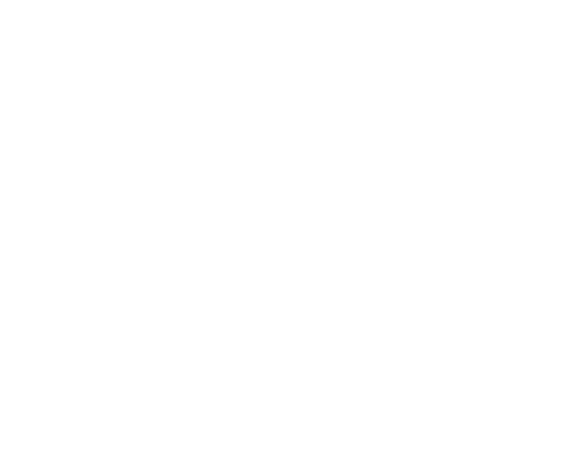

In [26]:
G = nx.Graph()

for _, row in colabs.iterrows():
    try:
        collaborations = row['collaboration_split']
        artist = row['interpret']
        G.add_node(artist)
        
        for collab in collaborations:
            collab = collab.strip()
            G.add_node(collab)
            G.add_edge(artist, collab)
    except:
        pass

pos = nx.spring_layout(G, k=1)
plt.figure(facecolor='white', figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.axis('off')
plt.show()

In [ ]:
# beschränkung auf die top 50 
    # genre 
    # fokus auf einen künstler
    # Entwicklung über die jahre


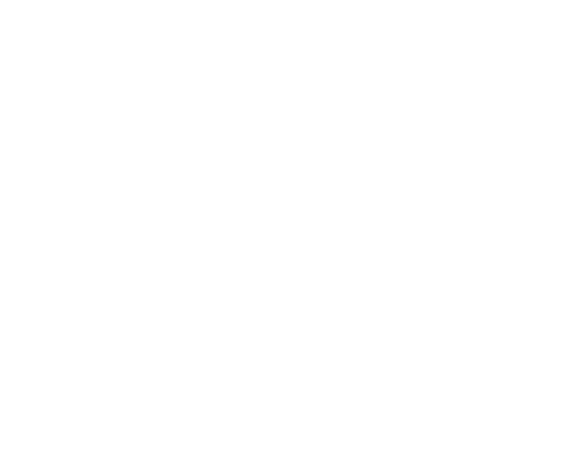

In [27]:
G = nx.Graph()

for _, row in colabs.head(30).iterrows():
    try:
        collaborations = row['collaboration_split']
        artist = row['interpret']
        G.add_node(artist)
        
        for collab in collaborations:
            collab = collab.strip()
            G.add_node(collab)
            G.add_edge(artist, collab)
    except:
        pass

pos = nx.spring_layout(G, k=1)
plt.figure(facecolor='white', figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.axis('off')
plt.show()

In [20]:
danju = colabs[colabs["full_title"].str.contains("Danju")]
danju

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count,collaboration,collaboration_split
5381,Rap,Cro,Trash,2009,Dance,2000,146426,Dance by CRO (Ft. Caro (Germany) & Danju),"{'year': 2009, 'month': None, 'day': None}",2009-01-01,"{'unreviewed_annotations': 0, 'hot': False}","Hey baby shake that ass Shake, shake, shake t...",Thursday,306,Caro (Germany,[Caro (Germany]
5390,Rap,Cro,Meine Musik,2011,Sorry Girl,2010,112268,Sorry Girl by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}","Mhh, yeah, Baby du bist wunderschön Und wir k...",Wednesday,119,Danju,[Danju]
5393,Rap,Cro,Meine Musik,2011,Mehr davon,2010,112271,Mehr davon by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}",(Mehr) Gib mir mehr davon Gib mir mehr davon...,Wednesday,75,Danju,[Danju]
5394,Rap,Cro,Meine Musik,2011,Super gelaunt,2010,112274,Super gelaunt by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}","Ja, ich bin so super gut gelaunt War schon l...",Wednesday,123,Danju,[Danju]
5395,Rap,Cro,Meine Musik,2011,Immer die Falschen,2010,112278,Immer die Falschen by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}","Ok, wieder mal ein Track über Chicks (Über C...",Wednesday,126,Danju,[Danju]
5398,Rap,Cro,Meine Musik,2011,Higher,2010,112286,Higher by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}",Sie seh'n endlich ein sie könn' machen was si...,Wednesday,125,Danju,[Danju]
5399,Rap,Cro,Meine Musik,2011,Frauen,2010,88671,Frauen by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 3}",2011-02-03,"{'unreviewed_annotations': 1, 'hot': False}",Komm bitte sag es mir Warum sind denn Frauen ...,Thursday,188,Danju,[Danju]
5406,Rap,Cro,Easy,2011,Vorbei,2010,106636,Vorbei by CRO (Ft. Danju),"{'year': 2011, 'month': 12, 'day': 2}",2011-12-02,"{'unreviewed_annotations': 0, 'hot': False}","Ey, nein ich hab' kein Haus am Meer Kein Auto...",Friday,246,Danju,[Danju]
5425,Rap,Cro,Sunny,2013,Höhenangst,2010,181485,Höhenangst by CRO (Ft. Danju),"{'year': 2013, 'month': 10, 'day': 16}",2013-10-16,"{'unreviewed_annotations': 3, 'hot': False, 'p...","Mach den Shit laut, Fenster weit auf Ich komm...",Wednesday,114,Danju,[Danju]
5428,Rap,Cro,Sunny,2013,Lange her,2010,3803827,Lange her by CRO (Ft. Danju),"{'year': 2013, 'month': 8, 'day': 7}",2013-08-07,"{'unreviewed_annotations': 0, 'hot': False}",Schön dass du wieder da bist Wir haben uns so...,Wednesday,99,Danju,[Danju]


### Wie grammatikalisch korrekt sind deutsche Songtexte?

In [28]:
# !pip install contextualSpellCheck
import contextualSpellCheck

# spacy.cli.download("de_core_news_lg")


nlp = spacy.load('de_core_news_lg')
contextualSpellCheck.add_to_pipe(nlp)


In [29]:
# Funktion zur Überprüfung der Rechtschreibung
def grammar_check(lyric):
    doc = nlp(lyric)
    return doc._.performed_spellCheck, doc._.outcome_spellCheck

texts = list(df["lyrics"].iloc[:50])
docs = nlp.pipe(texts)  


for i, doc in enumerate(docs):
    row = df.loc[i, "lyrics"]
    performed_spell_check, outcome_spell_check = grammar_check(row)
    print("Performed spell check:", performed_spell_check)
    print("Outcome of spell check:", outcome_spell_check)


Performed spell check: True
Outcome of spell check: Peter ce, das im Raper, dast Kindergarten, hat es Mann, das das hat in dieben. Es. KUKU TEAM, bin zu demt für hat miten, das bin is so ##m die., mit dem Bastard mit die Gnadenschuss Der die die Mann, der hat und die Mannn Herr, den den und, mit im Fladenbrot Was die Stern, Sofa so die das Packs, Max, Die, Die, das dien Was is das für dieen, das zu die Mann? Die Aura -? Der verschwinde zu den Radius Der die Tag so die den, der Herr, das in Ein die,en und mit scheißegal. legal, illegal, mit der scheißegal
Performed spell check: True
Outcome of spell check: Berlin, Die. The. The. Ther -t Je, j, ha, diet  Ducht du, du, es, Herr escht, Die bin Tag, das in Tag, Tag ims der Tag. Es gut mit die, in is Tag in Es bed es dir, es is Tag, So est die hat. Du, es, Herr escht. Derben zu dir dir dir das hene zu dir, ese mit, dir Herr und die an, easy Die denennät von dem. Ein Film in dir zu doll, dir von der forland, der wart mit diee dut, Memory Lost

MemoryError: 

In [142]:
texts = df["lyrics"].iloc[:10]  # Konvertiere die Spalte "lyrics" in eine Liste von Texten
#docs = nlp(texts) 

for row in texts:
    doc = nlp(row)
    print(row, doc)
    print(doc._.performed_spellCheck) #Should be True
    print(doc._.outcome_spellCheck)

  Manchmal hast du gar nichts mehr Nur noch deinen kleinen Traum Und dann wiegt es Tonnen schwer Du bist wie Luft ohne Raum Manchmal geht die Liebe fort Und es regnet dir ins Herz Die Welt begräbt dich lebend Und jeder Atemzug schmerzt Wenn nichts mehr bleibt Auf das du dich noch verlassen kannst  Wenn du denkst, dass alles vorbei ist Ich werde immer da sein Ich werde immer da sein Und wenn du glaubst, dass du ganz allein bist Ich werde immer da sein Für immer für dich da sein  Manchmal hinterfragst du alles Hörst damit auch Nachts nicht auf Sitzt im Treppenhaus und wartest Denn du traust dich nicht nachhaus' Manchmal geht die Liebe unter Und im Sommer wird es kalt Läufst die Straßen rauf und runter So wie ein Zug ohne Halt  Wenn nichts mehr bleibt Auf das du dich noch verlassen kannst  Wenn du denkst, dass alles vorbei ist Ich werde immer da sein Ich werde immer da sein Und wenn du glaubst, dass du ganz allein bist Ich werde immer da sein Für immer für dich da sein  Ich bin da, wenn d

In [30]:
tool = LanguageTool('de')
results = []

# Funktion zur Überprüfung der Grammatik
def grammar_check(lyric):
    matches = tool.check(lyric)
    total_errors = len(matches)
    total_words = len(lyric.split())
    percentage_correct = ((total_words - total_errors) / total_words) * 100

    return percentage_correct

df_copy = df.sample(frac=1).reset_index(drop=True)

count = 0
for idx, row in df_copy.iterrows():
    if count >= 200:
        break
    text = row['lyrics']
    count+= 1
    song_title = row['title']
    genre = row['genre']
    lyric_num = idx
    score_correct = f"{grammar_check(text):.2f}"
    score_incorrect = 100 -float(score_correct)

    matches = tool.check(text)
    for match in matches:
        message = match.message
        
    result = {'song_title': song_title, 'lyric_num': lyric_num, 'genres': genre, "score_correct": score_correct , "score_incorrect": score_incorrect , "message": message}

    results.append(result)



In [31]:
grammar_results = pd.DataFrame(results)
grammar_results

,song_title,lyric_num,genres,score_correct,score_incorrect,message
0,Hamburg,0,hip hop,92.59,7.41,Außer am Satzanfang werden nur Nomen und Eigen...
1,Wären alle so wie du,1,pop rock,84.96,15.04,Außer am Satzanfang werden nur Nomen und Eigen...
2,Neue Schritte,2,deutschrap,94.25,5.75,Außer am Satzanfang werden nur Nomen und Eigen...
3,Das geht auch vorbei,3,hip hop,90.11,9.89,Außer am Satzanfang werden nur Nomen und Eigen...
4,Frei,4,deutschrap,89.45,10.55,Außer am Satzanfang werden nur Nomen und Eigen...
...,...,...,...,...,...,...
195,Lui V alles,195,deutschrap,94.47,5.53,Möglicher Tippfehler: mehr als ein Leerzeichen...
196,Money,196,deutschrap,94.85,5.15,Außer am Satzanfang werden nur Nomen und Eigen...
197,Lullaby,197,deutschrap,92.18,7.82,"Bitte prüfen Sie, ob „Besseres“ hier großgesch..."
198,Und nun fängt alles das noch mal von vorne an,198,pop,85.03,14.97,Außer am Satzanfang werden nur Nomen und Eigen...


In [32]:
grammar_results['score_correct'] = pd.to_numeric(grammar_results['score_correct'])
grammar_results['score_incorrect'] = pd.to_numeric(grammar_results['score_incorrect'])

grammar_total_correct = grammar_results.groupby('genres')['score_correct'].mean()
grammar_total_incorrect =  grammar_results.groupby('genres')['score_incorrect'].mean()

grammar_total_incorrect


genres
[]               6.110000
ambient         10.130000
cloud rap        6.450000
deutschrap       9.272632
deutschrock     14.181667
electro         11.920000
emo             13.480000
hip hop         11.177500
hip-hop          8.820000
indie           11.301429
instrumental    11.853333
karneval        13.284000
ndw              9.105000
new wave        14.290000
party           15.250000
pop             11.085769
pop rock        15.040000
post-rock        9.305000
punk rock        8.205000
rap              9.092381
reggae          11.490000
rock            10.558889
schlager        11.759333
swing           13.685000
Name: score_incorrect, dtype: float64

In [33]:
grammar_total_correct

genres
[]              93.890000
ambient         89.870000
cloud rap       93.550000
deutschrap      90.727368
deutschrock     85.818333
electro         88.080000
emo             86.520000
hip hop         88.822500
hip-hop         91.180000
indie           88.698571
instrumental    88.146667
karneval        86.716000
ndw             90.895000
new wave        85.710000
party           84.750000
pop             88.914231
pop rock        84.960000
post-rock       90.695000
punk rock       91.795000
rap             90.907619
reggae          88.510000
rock            89.441111
schlager        88.240667
swing           86.315000
Name: score_correct, dtype: float64

In [34]:
grammar_per_genre = pd.concat([grammar_total_correct, grammar_total_incorrect], axis=1).reset_index()
grammar_per_genre.columns = ['genres', 'score_correct', 'score_incorrect']

In [36]:
grammar_per_genre_new = pd.melt(grammar_per_genre, id_vars='genres', var_name='score_type', value_name='score')
grammar_per_genre_new['score_type'] = grammar_per_genre_new['score_type'].map({'score_correct': 'Korrekt', 'score_incorrect': 'Inkorrekt'})


In [37]:
grammar_per_genre_new

,genres,score_type,score
0,[],Korrekt,93.890000
1,ambient,Korrekt,89.870000
2,cloud rap,Korrekt,93.550000
3,deutschrap,Korrekt,90.727368
4,deutschrock,Korrekt,85.818333
5,electro,Korrekt,88.080000
6,emo,Korrekt,86.520000
7,hip hop,Korrekt,88.822500
8,hip-hop,Korrekt,91.180000
9,indie,Korrekt,88.698571


In [38]:
fig = px.sunburst(grammar_per_genre_new, path=['genres', "score_type"], values='score' )

fig.update_layout(
    title={
        'text': "Grammatikalische Korrektheit von Songtexten",
        'x': 0.5
    }
)

fig.show()
